In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('test_dataset.csv')
df.head()

,address,chain_id,bytecode,opcode,malicious_category_l1,malicious_category_l2,data_source,man_validated,man_validated_by,comment,label
0,0xc9d7bd1fad7d5621dda20335818e9575ae07ea03,1,0x6080604052600436106103fe5760003560e01c806378...,PUSH1 PUSH1 MSTORE PUSH1 CALLDATASIZE LT PUSH2...,NaN,NaN,White_Lists,False,NaN,NaN,Clean
1,0x357d4db0c2179886334cc33b8528048f7e1d3fe3,1,0x608060405234801561001057600080fd5b5060043610...,PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...,NaN,NaN,White_Lists,False,NaN,NaN,Clean
2,0x5954ab967bc958940b7eb73ee84797dc8a2afbb9,1,0x608060405234801561001057600080fd5b5060043610...,PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...,NaN,NaN,White_Lists,False,NaN,NaN,Clean
3,0x5c9ad7b877f06e751ee006a3f27546757bbe53dd,43114,0x6080604052600436106100955760003560e01c806372...,PUSH1 PUSH1 MSTORE PUSH1 CALLDATASIZE LT PUSH2...,Cyber,Exploit,Public_Historical_Data,False,NaN,Data additionally gathered from Rekt db,Exploit
4,0x7a720b4f627b9e6f688023f4f2cc6c6dd7bd923c,137,0x608060405234801561001057600080fd5b5060043610...,PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...,NaN,NaN,Random_Data,False,NaN,NaN,Clean


In [3]:
print(df.shape)
df.columns

(3923, 11)


Index(['address', 'chain_id', 'bytecode', 'opcode', 'malicious_category_l1',
       'malicious_category_l2', 'data_source', 'man_validated',
       'man_validated_by', 'comment', 'label'],
      dtype='object')

In [4]:
df.isnull().sum()

address                     0
chain_id                    0
bytecode                    0
opcode                      0
malicious_category_l1    3373
malicious_category_l2    3373
data_source                 0
man_validated             132
man_validated_by         2979
comment                  2919
label                       0
dtype: int64

# First explore label related data

In [5]:
df["label"].value_counts()

label
Clean            3374
Exploit           349
FinancialScam     200
Name: count, dtype: int64

In [6]:
df[["malicious_category_l1", "malicious_category_l2"]].value_counts()

malicious_category_l1  malicious_category_l2
Cyber                  Exploit                  349
Fraud                  FinancialScam            201
Name: count, dtype: int64

In [7]:
# combine the two columns into one
df["malicious_category"] = df["malicious_category_l1"] + df["malicious_category_l2"]
df["malicious_category"] = df["malicious_category"].fillna("nan")
df.drop(columns=["malicious_category_l1", "malicious_category_l2"], inplace=True)

In [8]:
df[["malicious_category", "label"]].value_counts()

malicious_category  label        
nan                 Clean            3373
CyberExploit        Exploit           349
FraudFinancialScam  FinancialScam     200
                    Clean               1
Name: count, dtype: int64

In [9]:
df[(df["label"]!="FinancialScam")&(df["malicious_category"]=="FraudFinancialScam")]

,address,chain_id,bytecode,opcode,data_source,man_validated,man_validated_by,comment,label,malicious_category
2242,0x71f57929a3c4387dc9573413059a9dc8b106bdce,56,0x608060405234801561001057600080fd5b5060043610...,PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...,Public_Historical_Data,NaN,NaN,"reported by HashDit, ponzi",Clean,FraudFinancialScam


In [10]:
# there is a risk that this sample has a wrong label, since data on it is ambiguous, so I delete it
df = df[~((df["label"]!="FinancialScam")&(df["malicious_category"]=="FraudFinancialScam"))]
df[["malicious_category", "label"]].value_counts()

malicious_category  label        
nan                 Clean            3373
CyberExploit        Exploit           349
FraudFinancialScam  FinancialScam     200
Name: count, dtype: int64

In [11]:
# now "malicious_category" is one-to-one to "label" so it is not needed
df.drop(columns=["malicious_category"], inplace=True)

# Final labels proportion

In [12]:
(df["label"].value_counts()*100/len(df)).transform({"count": lambda x: round(x, 1)})

,count
label,
Clean,86.0
Exploit,8.9
FinancialScam,5.1


In [13]:
print(f"{round(df["man_validated"].sum()/len(df)*100, 1)} % human verified")

24.2 % human verified


In [14]:
df[["label", "man_validated"]].value_counts().to_frame().sort_values(by=["label", "man_validated"])

count
label         man_validated       
Clean         False           2724
              True             610
Exploit       False            109
              True             184
FinancialScam False              8
              True             156

In [15]:
df["address"].value_counts().rename("address_count").value_counts()

address_count
1    3890
2      16
Name: count, dtype: int64

In [16]:
df[df["address"].isin(df["address"].value_counts()[df["address"].value_counts()==2].index)][["address", "label"]].value_counts()

address                                     label  
0x1896adbe708bf91158748b3f33738ba497a69e8f  Clean      2
0x23208b91a98c7c1cd9fe63085bff68311494f193  Clean      2
0x26cfb7ef8fce43c8819b33c02f3d0498072e6fe1  Clean      2
0x2e96068b3d5b5bae3d7515da4a1d2e52d08a2647  Clean      2
0x634322671380cf1ee7bd555a77fcdd41e680d817  Clean      2
0x64b57f4249aa99a812212cee7daefedc40b203cd  Clean      2
0x831091da075665168e01898c6dac004a867f1e1b  Clean      2
0x8c425ee62d18b65cc975767c27c42de548d133a1  Exploit    2
0x8ef71fde0681f567d241a2cb7f2ae46d6d709d30  Clean      2
0x9bbdef63594d5ffc2f370fe52115ddffe97bc524  Clean      2
0x9be508ce41ae5795e1ebc247101c40da7d5742db  Exploit    2
0xa489fdc65229d6225014c0b357bcd19af6f00ee9  Clean      2
0xb4315e873dbcf96ffd0acd8ea43f689d8c20fb30  Clean      2
0xc0a47dfe034b400b47bdad5fecda2621de6c4d95  Clean      2
0xdfcdb5a86b167b3a418f3909d6f7a2f2873f2969  Exploit    2
0xe2a113cb9a5f7b4d37ce695bfada59dc4c08cc2b  Clean      2
Name: count, dtype: int64

# black listed addresses:

In [17]:
df[(df["address"].isin(df["address"].value_counts()[df["address"].value_counts()==2].index))&(df["label"]!="Clean")]["address"].unique()

array(['0xdfcdb5a86b167b3a418f3909d6f7a2f2873f2969',
       '0x8c425ee62d18b65cc975767c27c42de548d133a1',
       '0x9be508ce41ae5795e1ebc247101c40da7d5742db'], dtype=object)

### Chain ID and data source

In [18]:
df["chain_id"].value_counts()

chain_id
1        2232
56        531
42161     468
137       409
43114     194
10         47
99999      41
Name: count, dtype: int64

In [19]:
# total proportion
(df[["chain_id", "label"]].value_counts()*100/len(df)).to_frame().sort_values(by=["label", "count"], ascending=False).transform({"count": lambda x: round(x, 1)})

,,count
chain_id,label,
56,FinancialScam,2.5
1,FinancialScam,1.0
137,FinancialScam,0.8
42161,FinancialScam,0.4
10,FinancialScam,0.2
43114,FinancialScam,0.1
99999,FinancialScam,0.1
56,Exploit,4.0
1,Exploit,2.9


In [20]:
# proportion for each chain id
(df[["chain_id", "label"]].value_counts()*100/df["chain_id"].value_counts()).to_frame().sort_values(by=["chain_id", "count"], ascending=False).transform({"count": lambda x: round(x, 1)})

count
chain_id label               
99999    Clean           85.4
         Exploit          7.3
         FinancialScam    7.3
43114    Clean           89.2
         Exploit          8.2
         FinancialScam    2.6
42161    Clean           91.2
         Exploit          5.1
         FinancialScam    3.6
137      Clean           82.9
         Exploit          9.3
         FinancialScam    7.8
56       Clean           52.4
         Exploit         29.2
         FinancialScam   18.5
10       Clean           87.2
         FinancialScam   12.8
1        Clean           93.2
         Exploit          5.1
         FinancialScam    1.7

In [21]:
df["data_source"].value_counts()

data_source
White_Lists                2361
Manual_Validation           727
Random_Data                 367
Public_Historical_Data      352
Monitoring_and_Feedback     115
Name: count, dtype: int64

In [22]:
# total proportion
(df[["data_source", "label"]].value_counts()*100/len(df)).to_frame().sort_values(by=["label", "count"], ascending=False).transform({"count": lambda x: round(x, 1)})

,,count
data_source,label,
Manual_Validation,FinancialScam,2.7
Monitoring_and_Feedback,FinancialScam,1.6
Public_Historical_Data,FinancialScam,0.7
Random_Data,FinancialScam,0.1
Public_Historical_Data,Exploit,8.2
Monitoring_and_Feedback,Exploit,0.4
Manual_Validation,Exploit,0.3
Random_Data,Exploit,0.0
White_Lists,Clean,60.2


In [23]:
# proportion of labels by each data source
(df[["data_source", "label"]].value_counts()*100/df["data_source"].value_counts()).to_frame().sort_values(by=["data_source", "count"], ascending=False).transform({"count": lambda x: round(x, 1)})

count
data_source             label               
White_Lists             Clean          100.0
Random_Data             Clean           99.2
                        FinancialScam    0.5
                        Exploit          0.3
Public_Historical_Data  Exploit         90.9
                        FinancialScam    8.2
                        Clean            0.9
Monitoring_and_Feedback FinancialScam   54.8
                        Clean           30.4
                        Exploit         14.8
Manual_Validation       Clean           83.9
                        FinancialScam   14.6
                        Exploit          1.5

In [24]:
# chain id and data source proportion by label
(df[["chain_id", "label"]].value_counts()*100/df["label"].value_counts()).to_frame().sort_values(by=["label", "count"], ascending=False).transform({"count": lambda x: round(x, 1)})

,,count
chain_id,label,
56,FinancialScam,49.0
1,FinancialScam,19.5
137,FinancialScam,16.0
42161,FinancialScam,8.5
10,FinancialScam,3.0
43114,FinancialScam,2.5
99999,FinancialScam,1.5
56,Exploit,44.4
1,Exploit,32.4


In [25]:
# chain id and data source proportion by label
(df[["data_source", "label"]].value_counts()*100/df["label"].value_counts()).to_frame().sort_values(by=["label", "count"], ascending=False).transform({"count": lambda x: round(x, 1)})

,,count
data_source,label,
Manual_Validation,FinancialScam,53.0
Monitoring_and_Feedback,FinancialScam,31.5
Public_Historical_Data,FinancialScam,14.5
Random_Data,FinancialScam,1.0
Public_Historical_Data,Exploit,91.7
Monitoring_and_Feedback,Exploit,4.9
Manual_Validation,Exploit,3.2
Random_Data,Exploit,0.3
White_Lists,Clean,70.0


## Bytecode

In [26]:
df["bytecode"].value_counts().rename("bytecode_count").value_counts()

bytecode_count
1     3880
2       11
20       1
Name: count, dtype: int64

In [27]:
df["bytecode"].value_counts()[:1]

bytecode
0x    20
Name: count, dtype: int64

In [28]:
df[df["bytecode"] == "0x"]["opcode"].nunique()

20

In [29]:
df["opcode"].value_counts().value_counts()

count
1    3904
2       9
Name: count, dtype: int64

# Opcode investigation

In [30]:
df_small_opcode = df.transform({"opcode": lambda x: x if 1500 < len(x)<2000 else None, "label": lambda x: x}).dropna()
df_small_opcode[df_small_opcode["label"]=="FinancialScam"]

,opcode,label
1160,PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...,FinancialScam


PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2 JUMPI PUSH1 DUP1 REVERT JUMPDEST POP PUSH1 CALLDATASIZE LT PUSH2 JUMPI PUSH1 CALLDATALOAD PUSH1 SHR DUP1 PUSH4 0dbe671f EQ PUSH2 JUMPI JUMPDEST PUSH1 DUP1 REVERT JUMPDEST PUSH2 PUSH2 JUMP JUMPDEST STOP JUMPDEST PUSH1 MLOAD PUSH32 1249c58b00000000000000000000000000000000000000000000000000000000 DUP2 MSTORE PUSH20 eddb551809af5f6fe388288749cc89cb1bc5c495 SWAP1 DUP2 SWAP1 PUSH1 ADD PUSH1 PUSH1 MLOAD DUP1 DUP4 SUB DUP2 PUSH1 DUP7 GAS CALL SWAP2 POP POP RETURNDATASIZE DUP1 PUSH1 DUP2 EQ PUSH2 JUMPI PUSH1 MLOAD SWAP2 POP PUSH1 NOT PUSH1 RETURNDATASIZE ADD AND DUP3 ADD PUSH1 MSTORE RETURNDATASIZE DUP3 MSTORE RETURNDATASIZE PUSH1 PUSH1 DUP5 ADD RETURNDATACOPY PUSH2 JUMP JUMPDEST PUSH1 SWAP2 POP JUMPDEST POP POP PUSH1 MLOAD PUSH32 70a0823100000000000000000000000000000000000000000000000000000000 DUP2 MSTORE ADDRESS PUSH1 DUP3 ADD MSTORE PUSH20 ffffffffffffffffffffffffffffffffffffffff DUP4 AND SWAP2 POP PUSH4 a9059cbb SWAP1 CALLER SWAP1 DUP4 SWAP1 PUSH4 70a08231 SWAP1 PUSH1 ADD PUSH1 PUSH1 MLOAD DUP1 DUP4 SUB DUP2 DUP7 GAS STATICCALL ISZERO DUP1 ISZERO PUSH2 JUMPI RETURNDATASIZE PUSH1 DUP1 RETURNDATACOPY RETURNDATASIZE PUSH1 REVERT JUMPDEST POP POP POP POP PUSH1 MLOAD RETURNDATASIZE PUSH1 NOT PUSH1 DUP3 ADD AND DUP3 ADD DUP1 PUSH1 MSTORE POP DUP2 ADD SWAP1 PUSH2 SWAP2 SWAP1 PUSH2 JUMP JUMPDEST PUSH1 MLOAD PUSH32 ffffffff00000000000000000000000000000000000000000000000000000000 PUSH1 DUP6 SWAP1 SHL AND DUP2 MSTORE PUSH20 ffffffffffffffffffffffffffffffffffffffff SWAP1 SWAP3 AND PUSH1 DUP4 ADD MSTORE PUSH1 DUP3 ADD MSTORE PUSH1 ADD PUSH1 PUSH1 MLOAD DUP1 DUP4 SUB DUP2 PUSH1 DUP8 DUP1 EXTCODESIZE ISZERO DUP1 ISZERO PUSH2 JUMPI PUSH1 DUP1 REVERT JUMPDEST POP GAS CALL ISZERO DUP1 ISZERO PUSH2 JUMPI RETURNDATASIZE PUSH1 DUP1 RETURNDATACOPY RETURNDATASIZE PUSH1 REVERT JUMPDEST POP CALLER SWAP3 POP POP POP SELFDESTRUCT JUMPDEST PUSH1 PUSH1 DUP3 DUP5 SUB SLT ISZERO PUSH2 JUMPI PUSH1 DUP1 REVERT JUMPDEST POP MLOAD SWAP2 SWAP1 POP JUMP

In [31]:
df_small_opcode[df_small_opcode["label"]=="Exploit"][:1]

,opcode,label
3887,PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...,Exploit


PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2 JUMPI PUSH1 DUP1 REVERT JUMPDEST POP PUSH1 CALLDATASIZE LT PUSH2 JUMPI PUSH1 CALLDATALOAD PUSH1 SHR DUP1 PUSH4 1036bbe2 EQ PUSH2 JUMPI DUP1 PUSH4 1ee7f3c4 EQ PUSH2 JUMPI DUP1 PUSH4 990a4a2c EQ PUSH2 JUMPI JUMPDEST PUSH1 DUP1 REVERT JUMPDEST PUSH2 PUSH8 030d98d59a960000 DUP2 JUMP JUMPDEST PUSH1 MLOAD SWAP1 DUP2 MSTORE PUSH1 ADD PUSH1 MLOAD DUP1 SWAP2 SUB SWAP1 RETURN JUMPDEST PUSH2 PUSH2 CALLDATASIZE PUSH1 PUSH2 JUMP JUMPDEST PUSH2 JUMP JUMPDEST PUSH2 PUSH7 470de4df820000 DUP2 JUMP JUMPDEST PUSH1 DUP3 ISZERO PUSH2 JUMPI DUP2 DUP4 PUSH2 PUSH7 470de4df820000 PUSH8 030d98d59a960000 PUSH2 JUMP JUMPDEST PUSH2 SWAP2 SWAP1 PUSH2 JUMP JUMPDEST PUSH2 SWAP2 SWAP1 PUSH2 JUMP JUMPDEST PUSH2 SWAP1 PUSH7 470de4df820000 PUSH2 JUMP JUMPDEST PUSH2 JUMP JUMPDEST PUSH1 JUMPDEST SWAP4 SWAP3 POP POP POP JUMP JUMPDEST PUSH1 DUP1 PUSH1 DUP4 DUP6 SUB SLT ISZERO PUSH2 JUMPI PUSH1 DUP1 REVERT JUMPDEST POP POP DUP1 CALLDATALOAD SWAP3 PUSH1 SWAP1 SWAP2 ADD CALLDATALOAD SWAP2 POP JUMP JUMPDEST PUSH32 4e487b7100000000000000000000000000000000000000000000000000000000 PUSH1 MSTORE PUSH1 PUSH1 MSTORE PUSH1 PUSH1 REVERT JUMPDEST PUSH1 DUP3 DUP3 LT ISZERO PUSH2 JUMPI PUSH2 PUSH2 JUMP JUMPDEST POP SUB SWAP1 JUMP JUMPDEST PUSH1 DUP2 PUSH32 ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff DIV DUP4 GT DUP3 ISZERO ISZERO AND ISZERO PUSH2 JUMPI PUSH2 PUSH2 JUMP JUMPDEST POP MUL SWAP1 JUMP JUMPDEST PUSH1 DUP3 PUSH2 JUMPI PUSH32 4e487b7100000000000000000000000000000000000000000000000000000000 PUSH1 MSTORE PUSH1 PUSH1 MSTORE PUSH1 PUSH1 REVERT JUMPDEST POP DIV SWAP1 JUMP JUMPDEST PUSH1 DUP3 NOT DUP3 GT ISZERO PUSH2 JUMPI PUSH2 PUSH2 JUMP JUMPDEST POP ADD SWAP1 JUMP

In [32]:
df_small_opcode[df_small_opcode["label"]=="Clean"]

,opcode,label
354,PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...,Clean
407,PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...,Clean
427,PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...,Clean
486,PUSH1 CALLDATASIZE GT PUSH2 JUMPI PUSH2 JUMP J...,Clean
649,PUSH1 PUSH1 MSTORE CALLDATASIZE PUSH2 JUMPI PU...,Clean
796,PUSH1 PUSH1 MSTORE PUSH1 CALLDATASIZE LT PUSH2...,Clean
1076,PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...,Clean
1123,PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...,Clean
1258,PUSH1 CALLDATASIZE LT ISZERO PUSH2 JUMPI PUSH2...,Clean
1397,PUSH1 PUSH1 MSTORE PUSH1 CALLDATASIZE LT PUSH2...,Clean


PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2 JUMPI PUSH1 DUP1 REVERT JUMPDEST POP PUSH1 CALLDATASIZE LT PUSH2 JUMPI PUSH1 CALLDATALOAD PUSH1 SHR DUP1 PUSH4 e42cb9f3 EQ PUSH2 JUMPI JUMPDEST PUSH1 DUP1 REVERT JUMPDEST PUSH2 PUSH2 JUMP JUMPDEST PUSH1 MLOAD PUSH2 SWAP2 SWAP1 PUSH2 JUMP JUMPDEST PUSH1 MLOAD DUP1 SWAP2 SUB SWAP1 RETURN JUMPDEST PUSH1 DUP1 SLOAD PUSH2 SWAP1 PUSH2 JUMP JUMPDEST DUP1 PUSH1 ADD PUSH1 DUP1 SWAP2 DIV MUL PUSH1 ADD PUSH1 MLOAD SWAP1 DUP2 ADD PUSH1 MSTORE DUP1 SWAP3 SWAP2 SWAP1 DUP2 DUP2 MSTORE PUSH1 ADD DUP3 DUP1 SLOAD PUSH2 SWAP1 PUSH2 JUMP JUMPDEST DUP1 ISZERO PUSH2 JUMPI DUP1 PUSH1 LT PUSH2 JUMPI PUSH2 DUP1 DUP4 SLOAD DIV MUL DUP4 MSTORE SWAP2 PUSH1 ADD SWAP2 PUSH2 JUMP JUMPDEST DUP3 ADD SWAP2 SWAP1 PUSH1 MSTORE PUSH1 PUSH1 SHA3 SWAP1 JUMPDEST DUP2 SLOAD DUP2 MSTORE SWAP1 PUSH1 ADD SWAP1 PUSH1 ADD DUP1 DUP4 GT PUSH2 JUMPI DUP3 SWAP1 SUB PUSH1 AND DUP3 ADD SWAP2 JUMPDEST POP POP POP POP POP DUP2 JUMP JUMPDEST PUSH1 PUSH1 DUP1 DUP4 MSTORE DUP4 MLOAD DUP1 DUP3 DUP6 ADD MSTORE PUSH1 JUMPDEST DUP2 DUP2 LT ISZERO PUSH2 JUMPI DUP6 DUP2 ADD DUP4 ADD MLOAD DUP6 DUP3 ADD PUSH1 ADD MSTORE DUP3 ADD PUSH2 JUMP JUMPDEST POP PUSH1 PUSH1 DUP3 DUP7 ADD ADD MSTORE PUSH1 PUSH1 NOT PUSH1 DUP4 ADD AND DUP6 ADD ADD SWAP3 POP POP POP SWAP3 SWAP2 POP POP JUMP JUMPDEST PUSH1 DUP2 DUP2 SHR SWAP1 DUP3 AND DUP1 PUSH2 JUMPI PUSH1 DUP3 AND SWAP2 POP JUMPDEST PUSH1 DUP3 LT DUP2 SUB PUSH2 JUMPI PUSH4 4e487b71 PUSH1 SHL PUSH1 MSTORE PUSH1 PUSH1 MSTORE PUSH1 PUSH1 REVERT JUMPDEST POP SWAP2 SWAP1 POP JUMP

PUSH1 PUSH1 MSTORE PUSH1 CALLDATASIZE LT PUSH2 JUMPI PUSH1 CALLDATALOAD PUSH1 SHR DUP1 PUSH4 b6b55f25 EQ PUSH2 JUMPI JUMPDEST PUSH1 DUP1 REVERT JUMPDEST PUSH2 PUSH2 CALLDATASIZE PUSH1 PUSH2 JUMP JUMPDEST PUSH2 JUMP JUMPDEST STOP JUMPDEST PUSH1 MLOAD PUSH4 23b872dd PUSH1 SHL DUP2 MSTORE CALLER PUSH1 DUP3 ADD MSTORE ADDRESS PUSH1 DUP3 ADD MSTORE PUSH1 DUP2 ADD DUP3 SWAP1 MSTORE PUSH20 dac17f958d2ee523a2206206994597c13d831ec7 SWAP1 PUSH4 23b872dd SWAP1 PUSH1 ADD PUSH1 PUSH1 MLOAD DUP1 DUP4 SUB DUP2 PUSH1 DUP8 DUP1 EXTCODESIZE ISZERO DUP1 ISZERO PUSH2 JUMPI PUSH1 DUP1 REVERT JUMPDEST POP GAS CALL ISZERO DUP1 ISZERO PUSH2 JUMPI RETURNDATASIZE PUSH1 DUP1 RETURNDATACOPY RETURNDATASIZE PUSH1 REVERT JUMPDEST POP POP PUSH1 MLOAD PUSH4 a9059cbb PUSH1 SHL DUP2 MSTORE PUSH20 ccd4f9469bf6a742166ba5ea5b7e9f16173ae36d PUSH1 DUP3 ADD MSTORE PUSH1 DUP2 ADD DUP5 SWAP1 MSTORE PUSH20 dac17f958d2ee523a2206206994597c13d831ec7 SWAP3 POP PUSH4 a9059cbb SWAP2 POP PUSH1 ADD PUSH1 PUSH1 MLOAD DUP1 DUP4 SUB DUP2 PUSH1 DUP8 DUP1 EXTCODESIZE ISZERO DUP1 ISZERO PUSH2 JUMPI PUSH1 DUP1 REVERT JUMPDEST POP GAS CALL ISZERO DUP1 ISZERO PUSH2 JUMPI RETURNDATASIZE PUSH1 DUP1 RETURNDATACOPY RETURNDATASIZE PUSH1 REVERT JUMPDEST POP POP PUSH1 DUP1 MLOAD DUP5 DUP2 MSTORE TIMESTAMP PUSH1 DUP3 ADD MSTORE CALLER SWAP4 POP PUSH32 90890809c654f11d6e72a28fa60149770a0d11ec6c92319d6ceb2bb0a4ea1a15 SWAP3 POP ADD PUSH1 MLOAD DUP1 SWAP2 SUB SWAP1 LOG2 POP JUMP JUMPDEST PUSH1 PUSH1 DUP3 DUP5 SUB SLT ISZERO PUSH2 JUMPI PUSH1 DUP1 REVERT JUMPDEST POP CALLDATALOAD SWAP2 SWAP1 POP JUMP

<Axes: xlabel='label', ylabel='opcode_len'>

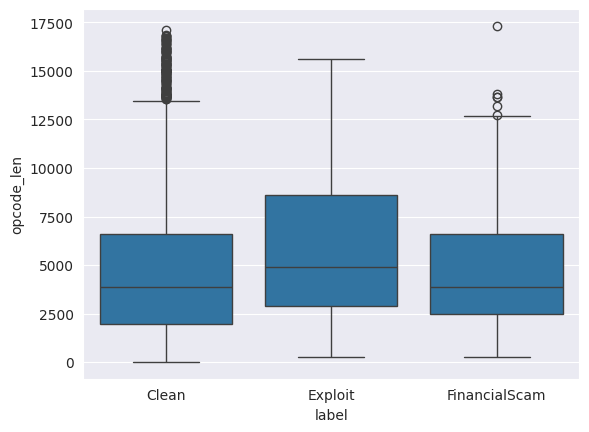

In [33]:
df["opcode_len"] = df['opcode'].str.split().apply(lambda x: len(x))
sns.boxplot(data=df, x="label", y="opcode_len")

## length of the code used for Exploit is higher on average than other labels
# There are about 58k unique code words used in the dataset

In [34]:
all_word_freq = df['opcode'].str.split().explode().value_counts()
all_word_freq

opcode
PUSH1                                                               2893046
PUSH2                                                               1665788
JUMPDEST                                                            1103437
POP                                                                 1076349
SWAP1                                                                973704
                                                                     ...   
e94e7f88819f66c19b097748cb754149f63b1a176ed425dee1f1ee933e6d09b0          1
6e6f7420656e6f75676820736861726573000000000000000000000000000000          1
63616e2774206275792030000000000000000000000000000000000000000000          1
6e6f7468696e6720746f20627579207769746800000000000000000000000000          1
0aeebf55                                                                  1
Name: count, Length: 58734, dtype: int64

# Only 139 code words are used frequently

In [35]:
cut_heuristic = len(df)//4
print(cut_heuristic)
all_word_freq[all_word_freq>cut_heuristic]

980


opcode
PUSH1                                                               2893046
PUSH2                                                               1665788
JUMPDEST                                                            1103437
POP                                                                 1076349
SWAP1                                                                973704
                                                                     ...   
2e1a7d4d                                                               1067
ffffffffffff                                                           1066
40c10f19                                                               1026
ffffffffffffffffffffffffffff                                            983
70a0823100000000000000000000000000000000000000000000000000000000        982
Name: count, Length: 139, dtype: int64

In [36]:
all_word_freq[all_word_freq>300]

opcode
PUSH1                                                               2893046
PUSH2                                                               1665788
JUMPDEST                                                            1103437
POP                                                                 1076349
SWAP1                                                                973704
                                                                     ...   
095ea7b300000000000000000000000000000000000000000000000000000000        313
d21220a7                                                                306
5361666545524332303a2063616c6c20746f206e6f6e2d636f6e747261637400        304
fbfa77cf                                                                303
ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff          303
Name: count, Length: 220, dtype: int64

In [37]:
all_word_freq[all_word_freq>100000]

opcode
PUSH1             2893046
PUSH2             1665788
JUMPDEST          1103437
POP               1076349
SWAP1              973704
ADD                910254
DUP1               866754
DUP2               844134
JUMP               744453
MSTORE             699987
DUP3               549835
JUMPI              504938
MLOAD              488494
SWAP2              453386
AND                390000
ISZERO             366096
SUB                343984
DUP4               322502
SHL                278990
REVERT             224286
SWAP3              196759
PUSH4              196609
DUP5               187756
SLOAD              163184
EQ                 136604
DUP6               123137
RETURNDATASIZE     118830
PUSH32             109774
Name: count, dtype: int64

In [38]:
df_code = pd.json_normalize(df["opcode"].str.split().apply(lambda x: {y: x.count(y)/len(x) for y in all_word_freq[all_word_freq>100000].index}))
df_code_l = df_code.join(df["label"])
df_code

,PUSH1,PUSH2,JUMPDEST,POP,SWAP1,ADD,DUP1,DUP2,JUMP,MSTORE,...,SHL,REVERT,SWAP3,PUSH4,DUP5,SLOAD,EQ,DUP6,RETURNDATASIZE,PUSH32
0,0.171970,0.064671,0.050433,0.043829,0.045544,0.034909,0.070332,0.043743,0.017497,0.030191,...,0.022043,0.025045,0.012523,0.014838,0.005146,0.016125,0.008320,0.002659,0.010636,0.001544
1,0.148762,0.110070,0.068733,0.052632,0.035809,0.024754,0.043980,0.042538,0.051190,0.016102,...,0.021149,0.010094,0.010094,0.016583,0.007931,0.006008,0.009613,0.005047,0.009373,0.008411
2,0.163748,0.080873,0.047973,0.049224,0.060170,0.051601,0.038091,0.050788,0.035089,0.046160,...,0.020578,0.007943,0.012197,0.010508,0.014323,0.010070,0.004879,0.008569,0.006380,0.002439
3,0.129397,0.084127,0.055456,0.073941,0.072055,0.036122,0.046591,0.041686,0.033575,0.015845,...,0.005282,0.014241,0.006036,0.011789,0.004433,0.013958,0.003112,0.004055,0.014901,0.000755
4,0.105629,0.117225,0.087814,0.082016,0.059983,0.043643,0.029201,0.043749,0.067046,0.023508,...,0.000527,0.005166,0.009804,0.004217,0.008539,0.006536,0.007063,0.008644,0.000738,0.007906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,0.181513,0.065756,0.046218,0.062815,0.041807,0.052311,0.049370,0.037605,0.028571,0.034874,...,0.024160,0.014916,0.016597,0.015546,0.008613,0.013655,0.006303,0.006723,0.014916,0.000000
3918,0.165811,0.071167,0.055026,0.067498,0.036684,0.042553,0.047689,0.041820,0.033749,0.034483,...,0.016141,0.016875,0.006603,0.012472,0.010271,0.000000,0.003668,0.003668,0.019076,0.012472
3919,0.102941,0.121107,0.100346,0.094291,0.067474,0.030277,0.032872,0.037197,0.081315,0.014706,...,0.001730,0.008651,0.012111,0.007785,0.010381,0.006055,0.006920,0.002595,0.005190,0.005190
3920,0.153886,0.046373,0.035233,0.071503,0.043523,0.071244,0.068912,0.063990,0.013212,0.040674,...,0.013731,0.012953,0.008290,0.004145,0.008031,0.004145,0.005181,0.007772,0.001036,0.001813


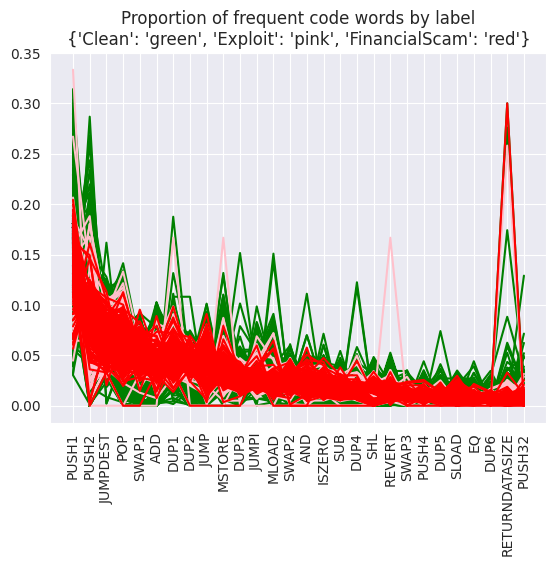

In [39]:
colors = dict(zip(df["label"].unique(), ["green", "pink", "red"]))
for i in df["label"].unique():
    plt.plot(df_code[df_code_l["label"]==i].T, c=colors[i])
plt.xticks(rotation=90)
plt.title(f"Proportion of frequent code words by label\n{colors}")
plt.show()

## no significant label specific pattern is detected

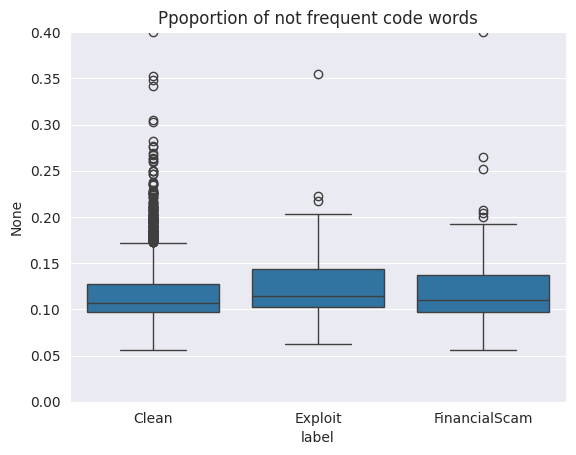

In [40]:
sns.boxplot(y=1-df_code.sum(1), x=df["label"])
plt.ylim(0, 0.4)
plt.title('Ppoportion of not frequent code words')
plt.show()

## this box plot shows that the proportion of not frequent code words can't show clearly the malicious activitly